# Hacktiv8 Introduction to Python for Data Science - Project Assignment 1

Nama  : Alifina Aulia Azzahra

Kelas : PYTN-KS-007

Kode Peserta : PYTN-KS07-004

# Project Overview

The dataset used in this project is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains :
- lsoa_code : this represents a policing area
- borough : the london borough for which the statistic is related
- major_category : the major crime category
- minor_category : the minor crime category
- value : the count of the crime for that particular borough, in that particular month
- year : the year of the summary statistic
- month : the month of the summary statistic

# Import Library

In [1]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data Loading

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

In [3]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [4]:
df.shape

(13490604, 7)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Melakukan pengecekan apakah terdapat missing value dan data yang duplikat pada dataset

In [6]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [7]:
df.duplicated().sum()

0

Karena tidak ditemukan missing value dan data yang duplikat pada dataset, akan diambil data yang tidak bernilai 0

In [8]:
df = df[df.value != 0]
df.shape

(3419099, 7)

Didapatkan data berukuran 3419099 data dengan 7 kolom untuk dianalisis

## Total Number of Crimes in Each Borough from 2008 until 2016

In [9]:
df.year.unique()

array([2016, 2009, 2012, 2013, 2014, 2008, 2015, 2011, 2010])

In [10]:
df.borough.unique()

array(['Sutton', 'Barking and Dagenham', 'Ealing', 'Hackney', 'Bromley',
       'Newham', 'Croydon', 'Bexley', 'Hounslow', 'Kingston upon Thames',
       'Southwark', 'Lambeth', 'Haringey', 'Barnet', 'Havering',
       'Waltham Forest', 'Brent', 'Westminster', 'Camden',
       'Kensington and Chelsea', 'Tower Hamlets', 'Richmond upon Thames',
       'Hillingdon', 'Lewisham', 'Redbridge', 'Islington', 'Harrow',
       'Merton', 'Wandsworth', 'Hammersmith and Fulham', 'Enfield',
       'Greenwich', 'City of London'], dtype=object)

In [11]:
total_crime = df.drop(
    ["lsoa_code", "major_category", "minor_category", "year", "month"], axis=1).groupby("borough").sum()
total_crime = total_crime.sort_values(by="value", ascending=True)
total_crime

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848
Havering,138947
Barking and Dagenham,149447


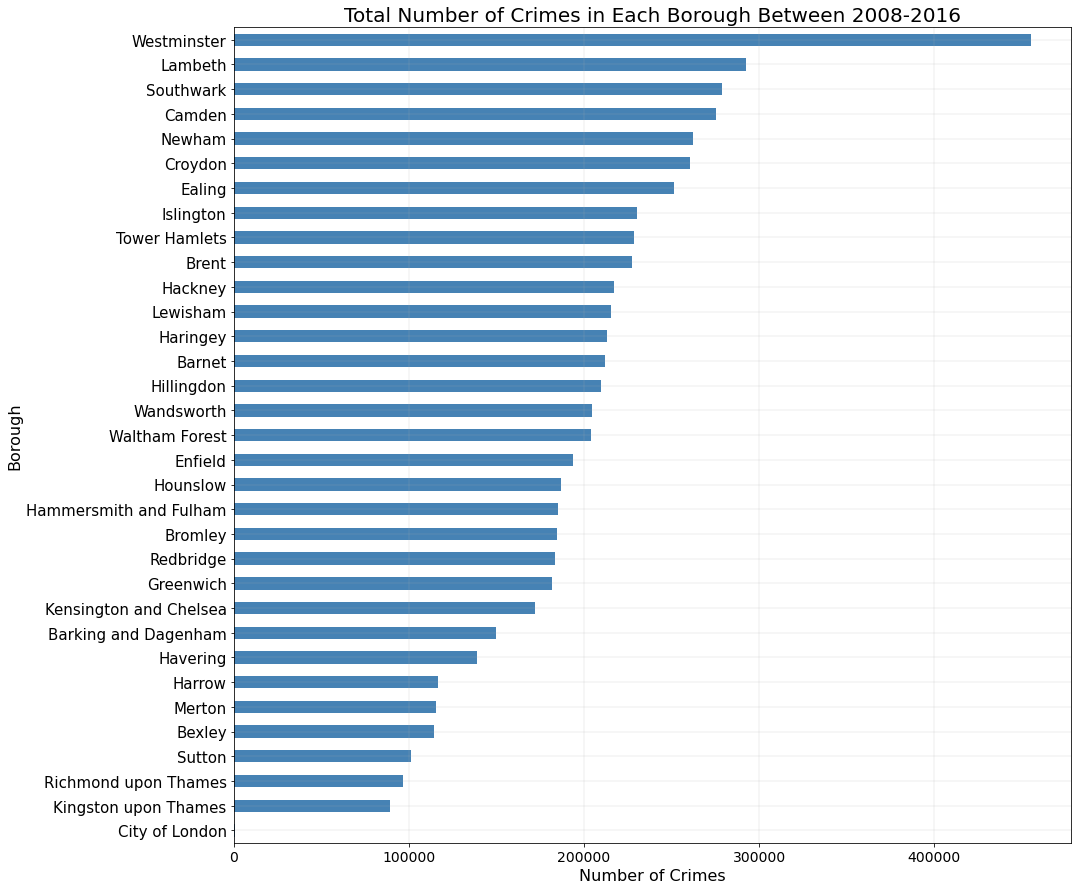

In [12]:
total_crime.plot(kind='barh', figsize=(15,15),legend = False, color='steelblue')

plt.xlabel("Number of Crimes", fontsize = 16)
plt.ylabel("Borough", fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.grid(linewidth=0.2)
plt.title("Total Number of Crimes in Each Borough Between 2008-2016", fontsize = 20)

plt.show()

Berdasarkan bar chart di atas, dapat disimpulkan jika Westminster merupakan wilayah dengan jumlah kasus kriminal tertinggi pada tahun 2008 hingga 2016.

## Proportion of Major Crime Category in Westminster from 2008 until 2016

Karena Westminster merupakan daerah dengan jumlah kasus kriminal tertinggi, maka akan diselidiki proporsi atau persentase untuk tiap kategori kejahatan yang terjadi di daerah tersebut pada tahun 2008 hingga 2016

In [13]:
wcrime_proportion = df.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
wcrime_proportion = wcrime_proportion.loc["Westminster"]
wcrime_proportion = wcrime_proportion.groupby("major_category").size()
wcrime_proportion

major_category
Burglary                       12359
Criminal Damage                13126
Drugs                           7747
Fraud or Forgery                 112
Other Notifiable Offences       3237
Robbery                         6055
Sexual Offences                   39
Theft and Handling             40013
Violence Against the Person    27382
dtype: int64

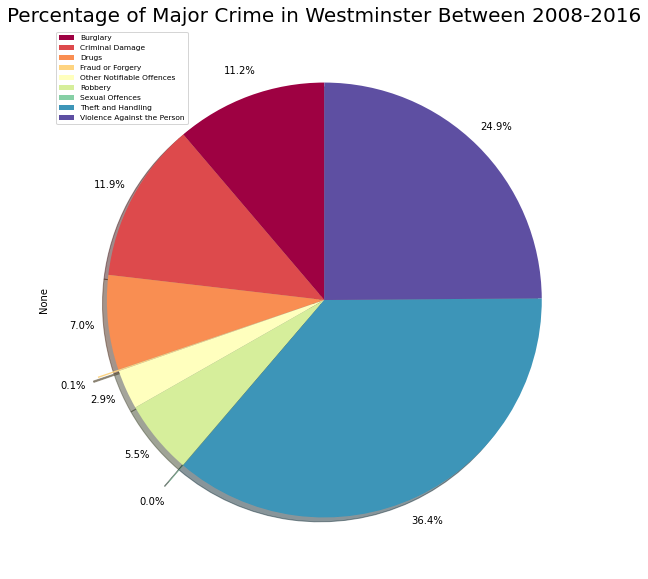

In [14]:
explode_list = explode_list = [0, 0, 0, 0.1, 0, 0, 0.1, 0, 0]
wcrime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                      shadow=True,
                      labels=None,
                       cmap='Spectral',
                       explode=explode_list,
                      pctdistance=1.12)
plt.title("Percentage of Major Crime in Westminster Between 2008-2016", fontsize=20, loc="center")
plt.legend(labels=wcrime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Berdasarkan pie chart di atas, terlihat bahwa persentase kategori kejahatan terbesar di Westminster pada tahun 2008 hingga 2016 adalah Theft and Handling yakni sebesar 36.4% dan terendah adalah kategori Sexual Offence dengan persentasenya yaitu 0.0%. Persentase untuk kategori kejahatan lain juga dapat dilihat pada pie chart di atas.

## Top 5 Major Crime Category in Westminster from 2008 until 2016

In [15]:
wmajor = df['borough'] == 'Westminster'
df_wmajor = df[wmajor]
df_wmajor

,lsoa_code,borough,major_category,minor_category,value,year,month
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
187,E01004654,Westminster,Theft and Handling,Theft From Motor Vehicle,3,2013,2
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8
280,E01004679,Westminster,Theft and Handling,Theft From Shops,5,2008,8
697,E01004736,Westminster,Violence Against the Person,Common Assault,10,2013,1
...,...,...,...,...,...,...,...
13490030,E01004728,Westminster,Drugs,Drug Trafficking,1,2013,4
13490133,E01004718,Westminster,Theft and Handling,Other Theft,2,2016,4
13490302,E01004711,Westminster,Violence Against the Person,Assault with Injury,1,2015,6
13490346,E01004724,Westminster,Theft and Handling,Theft From Shops,1,2008,9


In [16]:
top5_wmajor = df_wmajor.drop(["lsoa_code","borough","minor_category","month"], axis=1)
top5_wmajor.set_index("year", inplace=True)
top5_wmajor = top5_wmajor.groupby("major_category").sum()
top5_wmajor = top5_wmajor.sort_values(by="value", ascending=False).head(5)
top5_wmajor

,value
major_category,
Theft and Handling,277617
Violence Against the Person,71448
Drugs,34031
Burglary,29295
Criminal Damage,20405


In [17]:
df_top5wmajor = df_wmajor.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_top5wmajor = df_top5wmajor.loc[top5_wmajor.index]
df_top5wmajor = pd.pivot_table(df_top5wmajor, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_top5wmajor

major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,2962,2599,4075,29266,6697
2009,2957,2564,3894,29967,7053
2010,2682,2385,4632,29191,7127
2011,2900,2246,5670,33529,7432
2012,4083,2254,4654,38152,7130
2013,3906,2080,4151,33868,6887
2014,3435,2016,2804,28144,8432
2015,3152,2082,2102,27980,9856
2016,3218,2179,2049,27520,10834


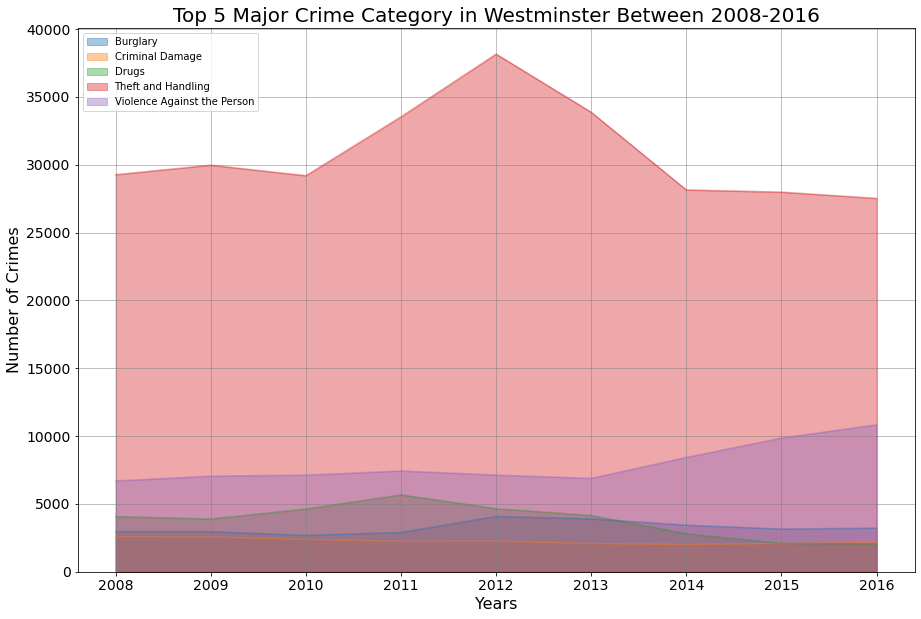

In [18]:
df_top5wmajor.index = df_top5wmajor.index.map(int)

df_top5wmajor.plot(kind='area', alpha=0.4, 
                   stacked=False,figsize=(15,10))

plt.title('Top 5 Major Crime Category in Westminster Between 2008-2016', fontsize = 20)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(color = "grey",linewidth=0.5)
plt.legend(loc="upper left")

plt.show()

Berdasarkan plot di atas, diketahui jika terdapat 5 kategori kejahatan dengan jumlah tertinggi di Westminster, yaitu Theft and Handling, Burglary, Criminal Damage, Drugs, dan Violence Against the Person. Dari kelima kategori tersebut, terlihat bahwa kategori Theft and Handling merupakan kategori kejahatan dengan jumlah tertinggi dibandingkan lainnya pada tahun 2008 hingga 2016. Dapat diketahui juga jika Theft and Handling mencapai jumlah tertinggi pada tahun 2012 dan mengalami penurunan pada 2013 dan 2014, lalu tidak mengalami kenaikan dan penurunan yang signifikan setelahnya.

## Top Minor Category in Westminster from 2008 to 2016

Berdasarkan analisis sebelumnya, tindak kriminal Theft merupakan major category yang sering terjadi di Westminster. Maka, selanjutnya akan dilihat minor category yang tergolong ke dalam tindak kriminal Theft (pencurian) di daerah Westminster.

In [19]:
data_wm_minor = df[['year','borough', 'major_category', 'minor_category', 'value']].loc[
    (df['borough']=='Westminster') & (df['major_category']=='Theft and Handling')]
data_wm_minor.head()

,year,borough,major_category,minor_category,value
134,2014,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1
187,2013,Westminster,Theft and Handling,Theft From Motor Vehicle,3
227,2016,Westminster,Theft and Handling,Theft From Motor Vehicle,6
280,2008,Westminster,Theft and Handling,Theft From Shops,5
751,2008,Westminster,Theft and Handling,Other Theft,11


In [20]:
data_wm_minor = data_wm_minor[['year','minor_category', 'value']].groupby(['year','minor_category']).agg({'value':'sum'})
data_wm_minor.head(40)

value
year minor_category                               
2008 Handling Stolen Goods                     105
     Motor Vehicle Interference & Tampering     31
     Other Theft                             16501
     Other Theft Person                       4121
     Theft From Motor Vehicle                 3026
     Theft From Shops                         3685
     Theft/Taking Of Motor Vehicle             621
     Theft/Taking of Pedal Cycle              1176
2009 Handling Stolen Goods                     115
     Motor Vehicle Interference & Tampering     24
     Other Theft                             16045
     Other Theft Person                       4932
     Theft From Motor Vehicle                 2234
     Theft From Shops                         4406
     Theft/Taking Of Motor Vehicle             481
     Theft/Taking of Pedal Cycle              1730
2010 Handling Stolen Goods                      82
     Motor Vehicle Interference & Tampering     34
     Other Theft                             15906
     Other Theft Person                       5015
     Theft From Motor Vehicle                 2192
     Theft From Shops                         3815
     Theft/Taking Of Motor Vehicle             543
     Theft/Taking of Pedal Cycle              1604
2011 Handling Stolen Goods                     117
     Motor Vehicle Interference & Tampering     36
     Other Theft                             17872
     Other Theft Person                       7243
     Theft From Motor Vehicle                 2394
     Theft From Shops                         3840
     Theft/Taking Of Motor Vehicle             496
     Theft/Taking of Pedal Cycle              1531
2012 Handling Stolen Goods                     104
     Motor Vehicle Interference & Tampering    125
     Other Theft                             19556
     Other Theft Person                       9228
     Theft From Motor Vehicle                 2519
     Theft From Shops                         4378
     Theft/Taking Of Motor Vehicle             586
     Theft/Taking of Pedal Cycle              1656

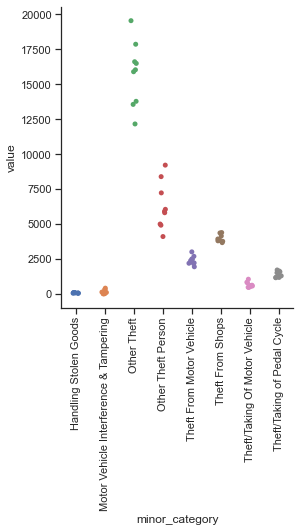

In [21]:
sns.set_theme(style="ticks", color_codes=True)
minor_plot = sns.catplot(x="minor_category", y="value", data=data_wm_minor.reset_index())
minor_plot.set_xticklabels(rotation=90)

Berdasarkan hasil yang diperoleh, didapatkan bahwa Handling Stolen Goods, Motor Vehicle Interference & Tampering, dan Theft From Shops memiliki angka kejadian yang lebih rendah dibandingkan dengan kejadian yang tergolong ke dalam kejadian Other theft dan Other theft person.

## Top Borough with the Highest Number of Other Theft Category from 2008 until 2016

In [22]:
data_wm_minor = df[['year','borough', 'minor_category', 'value']].loc[
    (df['minor_category']=='Other Theft')]
data_wm_minor.head()

,year,borough,minor_category,value
43,2014,Croydon,Other Theft,1
159,2014,Southwark,Other Theft,1
174,2008,Haringey,Other Theft,1
288,2016,Kensington and Chelsea,Other Theft,2
348,2010,Waltham Forest,Other Theft,4


In [23]:
df_minor = data_wm_minor.groupby(['borough','year']).sum()
df_minor.reset_index(inplace=True)
df_min = df_minor.pivot(index='year', columns='borough', values='value')
df_min.columns.name=None
df_min

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,1597.0,2704.0,1400.0,2185.0,2482.0,7220.0,NaN,3159.0,2675.0,1826.0,...,1524.0,2917.0,1943.0,1402.0,4599.0,1569.0,3336.0,2084.0,3325.0,16501.0
2009,1515.0,2744.0,1291.0,2323.0,2133.0,7240.0,NaN,2979.0,2494.0,1778.0,...,1449.0,2745.0,2053.0,1368.0,3845.0,1248.0,3143.0,2121.0,3147.0,16045.0
2010,1773.0,2962.0,1446.0,2400.0,2342.0,8066.0,NaN,3548.0,2985.0,1812.0,...,1660.0,3386.0,2180.0,1433.0,4321.0,1455.0,3529.0,3047.0,3045.0,15906.0
2011,1860.0,3094.0,1366.0,2830.0,2671.0,8551.0,26.0,3887.0,3163.0,2134.0,...,1579.0,3347.0,2403.0,1603.0,4965.0,1538.0,3904.0,2963.0,2916.0,17872.0
2012,2262.0,4148.0,1658.0,3113.0,3192.0,8295.0,68.0,4834.0,4034.0,2737.0,...,1936.0,4766.0,2968.0,1690.0,5427.0,1480.0,4345.0,3642.0,3899.0,19556.0
2013,1965.0,3713.0,1453.0,2794.0,2842.0,7057.0,34.0,3970.0,3586.0,2744.0,...,1721.0,4079.0,2751.0,1479.0,5309.0,1322.0,4067.0,3122.0,3526.0,16620.0
2014,1940.0,3600.0,1414.0,2929.0,2771.0,5990.0,40.0,3884.0,3343.0,3158.0,...,1597.0,4105.0,2592.0,1466.0,4720.0,1399.0,3533.0,3018.0,3264.0,13790.0
2015,1908.0,3436.0,1400.0,2970.0,2825.0,6140.0,43.0,3557.0,3415.0,2822.0,...,1690.0,4072.0,2420.0,1278.0,4824.0,1204.0,3542.0,2813.0,3470.0,13570.0
2016,1920.0,3565.0,1481.0,3235.0,2677.0,5706.0,59.0,3203.0,3470.0,2791.0,...,1544.0,3872.0,2450.0,1389.0,4869.0,1133.0,3596.0,2652.0,3364.0,12172.0


In [24]:
df_min.isnull().any()

Barking and Dagenham      False
Barnet                    False
Bexley                    False
Brent                     False
Bromley                   False
Camden                    False
City of London             True
Croydon                   False
Ealing                    False
Enfield                   False
Greenwich                 False
Hackney                   False
Hammersmith and Fulham    False
Haringey                  False
Harrow                    False
Havering                  False
Hillingdon                False
Hounslow                  False
Islington                 False
Kensington and Chelsea    False
Kingston upon Thames      False
Lambeth                   False
Lewisham                  False
Merton                    False
Newham                    False
Redbridge                 False
Richmond upon Thames      False
Southwark                 False
Sutton                    False
Tower Hamlets             False
Waltham Forest            False
Wandswor

In [25]:
df_min['City of London'] = df_min['City of London'].fillna(0)
df_min

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,1597.0,2704.0,1400.0,2185.0,2482.0,7220.0,0.0,3159.0,2675.0,1826.0,...,1524.0,2917.0,1943.0,1402.0,4599.0,1569.0,3336.0,2084.0,3325.0,16501.0
2009,1515.0,2744.0,1291.0,2323.0,2133.0,7240.0,0.0,2979.0,2494.0,1778.0,...,1449.0,2745.0,2053.0,1368.0,3845.0,1248.0,3143.0,2121.0,3147.0,16045.0
2010,1773.0,2962.0,1446.0,2400.0,2342.0,8066.0,0.0,3548.0,2985.0,1812.0,...,1660.0,3386.0,2180.0,1433.0,4321.0,1455.0,3529.0,3047.0,3045.0,15906.0
2011,1860.0,3094.0,1366.0,2830.0,2671.0,8551.0,26.0,3887.0,3163.0,2134.0,...,1579.0,3347.0,2403.0,1603.0,4965.0,1538.0,3904.0,2963.0,2916.0,17872.0
2012,2262.0,4148.0,1658.0,3113.0,3192.0,8295.0,68.0,4834.0,4034.0,2737.0,...,1936.0,4766.0,2968.0,1690.0,5427.0,1480.0,4345.0,3642.0,3899.0,19556.0
2013,1965.0,3713.0,1453.0,2794.0,2842.0,7057.0,34.0,3970.0,3586.0,2744.0,...,1721.0,4079.0,2751.0,1479.0,5309.0,1322.0,4067.0,3122.0,3526.0,16620.0
2014,1940.0,3600.0,1414.0,2929.0,2771.0,5990.0,40.0,3884.0,3343.0,3158.0,...,1597.0,4105.0,2592.0,1466.0,4720.0,1399.0,3533.0,3018.0,3264.0,13790.0
2015,1908.0,3436.0,1400.0,2970.0,2825.0,6140.0,43.0,3557.0,3415.0,2822.0,...,1690.0,4072.0,2420.0,1278.0,4824.0,1204.0,3542.0,2813.0,3470.0,13570.0
2016,1920.0,3565.0,1481.0,3235.0,2677.0,5706.0,59.0,3203.0,3470.0,2791.0,...,1544.0,3872.0,2450.0,1389.0,4869.0,1133.0,3596.0,2652.0,3364.0,12172.0


In [26]:
df_min = df_min.transpose()
df_min['Total'] = df_min.sum(axis=1)
df_min

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Barking and Dagenham,1597.0,1515.0,1773.0,1860.0,2262.0,1965.0,1940.0,1908.0,1920.0,16740.0
Barnet,2704.0,2744.0,2962.0,3094.0,4148.0,3713.0,3600.0,3436.0,3565.0,29966.0
Bexley,1400.0,1291.0,1446.0,1366.0,1658.0,1453.0,1414.0,1400.0,1481.0,12909.0
Brent,2185.0,2323.0,2400.0,2830.0,3113.0,2794.0,2929.0,2970.0,3235.0,24779.0
Bromley,2482.0,2133.0,2342.0,2671.0,3192.0,2842.0,2771.0,2825.0,2677.0,23935.0
Camden,7220.0,7240.0,8066.0,8551.0,8295.0,7057.0,5990.0,6140.0,5706.0,64265.0
City of London,0.0,0.0,0.0,26.0,68.0,34.0,40.0,43.0,59.0,270.0
Croydon,3159.0,2979.0,3548.0,3887.0,4834.0,3970.0,3884.0,3557.0,3203.0,33021.0
Ealing,2675.0,2494.0,2985.0,3163.0,4034.0,3586.0,3343.0,3415.0,3470.0,29165.0
Enfield,1826.0,1778.0,1812.0,2134.0,2737.0,2744.0,3158.0,2822.0,2791.0,21802.0


In [27]:
total_value = df_min['Total'].sum()
total_value

980085.0

In [28]:
max_words = 65
word_string = ''
for country in df_min.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_min.loc[country,'Total']/float(total_value)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'Barnet Brent Bromley Camden Camden Camden Camden Croydon Croydon Ealing Enfield Greenwich Hackney Hackney Haringey Havering Hillingdon Hillingdon Hounslow Islington Islington Lambeth Lambeth Lewisham Newham Newham Redbridge Southwark Southwark Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate(word_string)

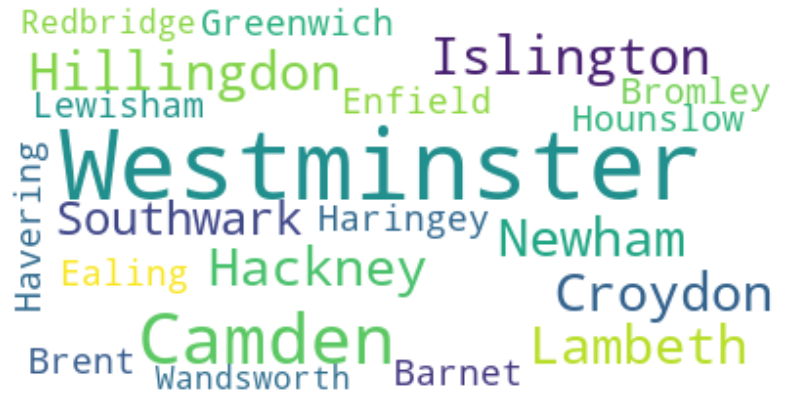

In [30]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Berdasarkan word cloud diatas dapat disimpulkan bahwa daerah dengan tindak kriminal kategori Other Theft terbanyak pada tahun 2008 hingga 2016 adalah daerah Westminster. Lalu diikuti daerah Camden, Lambeth, dan Southwark.

## Westminster's Trend for Other Theft in 2012

Pada analisis sebelumnya, tindak kriminal Other Theft merupakan minor category yang sering terjadi di Westminster. Maka, selanjutnya akan dilihat tren tindak kriminal Other Theft di Westminster pada tahun 2012.

In [31]:
df1 = df['year'] == 2012
df_2012 = df[df1]
df_2012

,lsoa_code,borough,major_category,minor_category,value,year,month
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
62,E01002977,Kingston upon Thames,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,3
95,E01002093,Haringey,Violence Against the Person,Harassment,1,2012,3
148,E01003974,Southwark,Criminal Damage,Criminal Damage To Dwelling,1,2012,1
175,E01001012,Croydon,Theft and Handling,Theft From Motor Vehicle,9,2012,4
...,...,...,...,...,...,...,...
13490517,E01000292,Barnet,Theft and Handling,Theft From Shops,3,2012,6
13490534,E01003945,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,7
13490537,E01001793,Hackney,Criminal Damage,Criminal Damage To Other Building,1,2012,7
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [32]:
data_wm_minor = df_2012[['year','month','borough', 'minor_category', 'value']].loc[
    (df['borough']=='Westminster') & (df['minor_category']=='Other Theft')]
data_wm_minor.head()

,year,month,borough,minor_category,value
785,2012,7,Westminster,Other Theft,1
3950,2012,2,Westminster,Other Theft,5
23486,2012,11,Westminster,Other Theft,38
59508,2012,4,Westminster,Other Theft,5
78787,2012,4,Westminster,Other Theft,4


In [33]:
data_wm_minor = data_wm_minor[['year','month','value']].groupby(['year','month']).agg({'value':'sum'})
data_wm_minor.head(12)

value
year month       
2012 1       1816
     2       1531
     3       1938
     4       1491
     5       1678
     6       1597
     7       1691
     8       1559
     9       1309
     10      1594
     11      1619
     12      1733

Text(0.5, 0, 'Month')

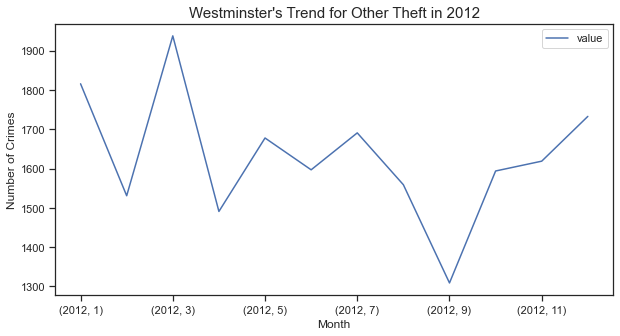

In [34]:
data_wm_minor.plot(kind='line', figsize=(10,5))
plt.title("Westminster's Trend for Other Theft in 2012", fontsize=15)
plt.ylabel("Number of Crimes")
plt.xlabel("Month")

Berdasarkan plot di atas, terlihat bahwa pada bulan Maret 2012, jumlah tindak kriminal pada kategori Theft and Handling untuk Other Theft mencapai angka tertinggi, yaitu 1938. Selain itu, pada bulan September 2012, jumlah tindak kriminal pada kategori Theft and Handling untuk Other Theft mencapai angka terendah, yaitu 1309.

## Box Plot of Westminster's Other Theft in 2012

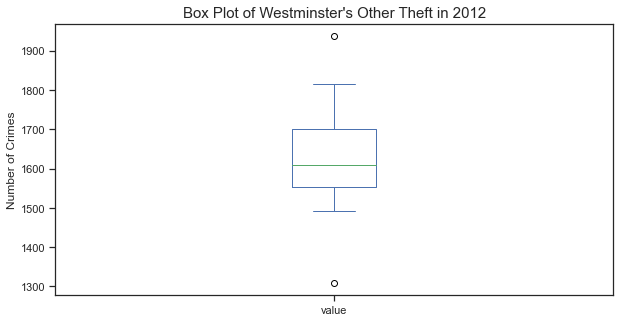

In [35]:
data_wm_minor.plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Westminster's Other Theft in 2012", fontsize=15)
plt.ylabel("Number of Crimes")
plt.show()

Berdasarkan hasil yang diperoleh, didapatkan jika angka rata-rata kejadian tindak kriminal untuk Other Theft di Westminster pada 2012, yaitu sekitar lebih dari 1600 kejadian setiap bulannya dengan angka tertinggi kejadian lebih dari 1900 kasus dan terendah sekitar 1300 kasus.

## Frequency Distribution of the Number of Crimes in 4 Boroughs with the Highest Number in 2012

In [36]:
df1 = df['year'] == 2012
df_2012 = df[df1]
df_2012

,lsoa_code,borough,major_category,minor_category,value,year,month
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
62,E01002977,Kingston upon Thames,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,3
95,E01002093,Haringey,Violence Against the Person,Harassment,1,2012,3
148,E01003974,Southwark,Criminal Damage,Criminal Damage To Dwelling,1,2012,1
175,E01001012,Croydon,Theft and Handling,Theft From Motor Vehicle,9,2012,4
...,...,...,...,...,...,...,...
13490517,E01000292,Barnet,Theft and Handling,Theft From Shops,3,2012,6
13490534,E01003945,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,7
13490537,E01001793,Hackney,Criminal Damage,Criminal Damage To Other Building,1,2012,7
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [37]:
month = df_2012.drop(["lsoa_code","major_category","minor_category","year"], axis=1)
month.set_index("month", inplace=True)
month = month.groupby("borough").sum()
month = month.sort_values(by="value", ascending=False).head(4)
month

,value
borough,
Westminster,59226
Lambeth,33473
Camden,31472
Southwark,30737


In [38]:
df_f = df_2012.drop(["lsoa_code","major_category","minor_category"], axis=1).set_index("borough")
df_f = df_f.loc[month.index]
df_f = pd.pivot_table(df_f, values="value", aggfunc=np.sum, index="month", columns="borough")
df_f

borough,Camden,Lambeth,Southwark,Westminster
month,,,,
1,2617,3154,2558,5084
2,2401,2311,2465,4381
3,2918,2995,2714,5362
4,2598,2736,2234,4623
5,2970,2745,2731,5104
6,2645,2887,2695,4797
7,2855,2748,2719,5428
8,2513,2872,2619,5246
9,2264,2698,2349,4341


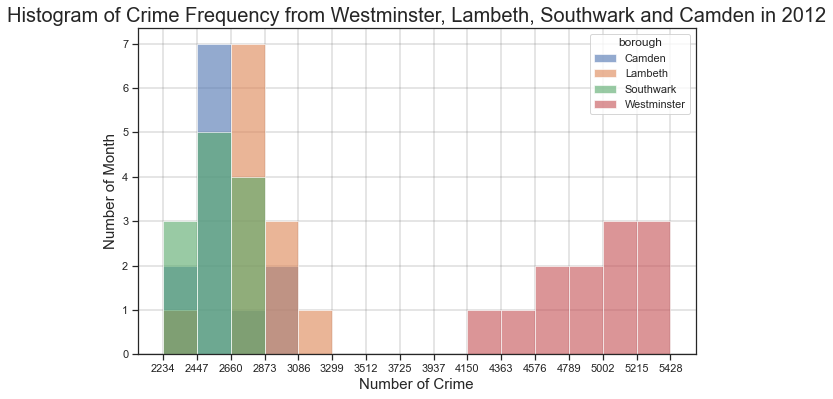

In [39]:
count, bin_edges = np.histogram(df_f, 15)

df_f.plot(kind='hist', figsize=(10,6),
         bins=15, alpha=0.6, xticks=bin_edges)

plt.title("Histogram of Crime Frequency from Westminster, Lambeth, Southwark and Camden in 2012", fontsize=20)
plt.xlabel("Number of Crime", fontsize=15)
plt.ylabel("Number of Month", fontsize=15)
plt.grid(color="grey", linewidth=0.4)
plt.show()

Pada Histogram diatas dapat dilihat bahwa distribusi tindak kriminal di daerah Westminster adalah yang terbanyak dan termasuk kasus yang beda jauh dengan kota lainnya. Lalu untuk daerah Lambeth, Southwark, dan Camden jumlah kasus yang terjadi hampir sama.

## Number of Crime Maps

In [40]:
london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=10)
london_map

In [41]:
df2 = df[['borough','value']]
london_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
m = folium.Map(location=[51.507351, -0.127758], zoom_start=11)
folium.Choropleth(
    geo_data=london_geo,
    data=df2,
    columns=["borough", "value"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Crime rate in boroughs of London",
    highlight=True,
).add_to(m)

m

Berdasarkan peta di atas, terlihat bahwa daerah Westminster berwarna merah yang berarti daerah tersebut memiliki tingkat kriminal tertinggi di London. Selain itu, juga dapat dilihat tingkat jumlah kriminal di daerah lain berdasarkan warnanya. Semakin gelap atau merah warnanya, maka semakin tinggi tingkat jumlah kriminal di daerah tersebut. Sebaliknya, semakin cerah atau kuning warna daerahnya, semakin rendah tingkat jumlah kriminal di daerah tersebut.

# Overall Analysis

- Westminster merupakan wilayah dengan jumlah kasus kriminal tertinggi pada tahun 2008 hingga 2016.
- Persentase kategori kejahatan terbesar di Westminster pada tahun 2008 hingga 2016 adalah Theft and Handling yakni sebesar 36.4% dan terendah adalah kategori Sexual Offence dengan persentasenya yaitu 0.0%.
- Terdapat 5 kategori kejahatan dengan jumlah tertinggi di Westminster, yaitu Theft and Handling, Burglary, Criminal Damage, Drugs, dan Violence Against the Person. Dari kelima kategori tersebut, terlihat bahwa kategori Theft and Handling merupakan kategori kejahatan dengan jumlah tertinggi dibandingkan lainnya pada tahun 2008 hingga 2016. 
- Handling Stolen Goods, Motor Vehicle Interference & Tampering, dan Theft From Shops memiliki angka kejadian yang lebih rendah dibandingkan dengan kejadian yang tergolong ke dalam kejadian Other theft dan Other theft person.
- Daerah dengan tindak kriminal kategori Other Theft terbanyak pada tahun 2008 hingga 2016 adalah daerah Westminster. Lalu diikuti daerah Camden, Lambeth, dan Southwark.
- Pada bulan Maret 2012, jumlah tindak kriminal pada kategori Theft and Handling untuk Other Theft mencapai angka tertinggi, yaitu 1938. Selain itu, pada bulan September 2012, jumlah tindak kriminal pada kategori Theft and Handling untuk Other Theft mencapai angka terendah, yaitu 1309.
- Angka rata-rata kejadian tindak kriminal untuk Other Theft di Westminster pada 2012, yaitu sekitar lebih dari 1600 kejadian setiap bulannya dengan angka tertinggi kejadian lebih dari 1900 kasus dan terendah sekitar 1300 kasus.
- Distribusi tindak kriminal di daerah Westminster adalah yang terbanyak dan termasuk kasus yang beda jauh dengan kota lainnya. Lalu untuk daerah Lambeth, Southwark, dan Camden jumlah kasus yang terjadi hampir sama.
- Pada peta, terlihat bahwa daerah Westminster berwarna merah yang berarti daerah tersebut memiliki tingkat kriminal tertinggi di London. Selain itu, juga dapat dilihat tingkat jumlah kriminal di daerah lain berdasarkan warnanya. Semakin gelap atau merah warnanya, maka semakin tinggi tingkat jumlah kriminal di daerah tersebut.